In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


In [82]:
batch, sbins, time = 3, 4, 10

time = torch.linspace(-np.pi/2, 3*np.pi/2, time)
wave = torch.linspace(3, 10, time)
tensor = torch.sin(time).unsqueeze(0).unsqueeze(-1).expand(batch, sbins, time).permute(0,2,1)
tensor, tensor.shape, tensor.dtype, tensor.device

TypeError: linspace() received an invalid combination of arguments - got (int, int, Tensor), but expected one of:
 * (Tensor start, Tensor end, int steps, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (Number start, Tensor end, int steps, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (Tensor start, Number end, int steps, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (Number start, Number end, int steps, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)


In [83]:
mask = tensor >= 0
mask, mask.shape, mask.dtype, mask.device

(tensor([[[False, False, False,  True,  True,  True,  True, False, False, False],
          [False, False, False,  True,  True,  True,  True, False, False, False],
          [False, False, False,  True,  True,  True,  True, False, False, False],
          [False, False, False,  True,  True,  True,  True, False, False, False]],
 
         [[False, False, False,  True,  True,  True,  True, False, False, False],
          [False, False, False,  True,  True,  True,  True, False, False, False],
          [False, False, False,  True,  True,  True,  True, False, False, False],
          [False, False, False,  True,  True,  True,  True, False, False, False]],
 
         [[False, False, False,  True,  True,  True,  True, False, False, False],
          [False, False, False,  True,  True,  True,  True, False, False, False],
          [False, False, False,  True,  True,  True,  True, False, False, False],
          [False, False, False,  True,  True,  True,  True, False, False, False]]]),
 torch.

In [84]:
positive = tensor * mask.float()
positive, positive.shape, positive.dtype, positive.device

(tensor([[[-0.0000, -0.0000, -0.0000, 0.5000, 0.9397, 0.9397, 0.5000, -0.0000,
           -0.0000, -0.0000],
          [-0.0000, -0.0000, -0.0000, 0.5000, 0.9397, 0.9397, 0.5000, -0.0000,
           -0.0000, -0.0000],
          [-0.0000, -0.0000, -0.0000, 0.5000, 0.9397, 0.9397, 0.5000, -0.0000,
           -0.0000, -0.0000],
          [-0.0000, -0.0000, -0.0000, 0.5000, 0.9397, 0.9397, 0.5000, -0.0000,
           -0.0000, -0.0000]],
 
         [[-0.0000, -0.0000, -0.0000, 0.5000, 0.9397, 0.9397, 0.5000, -0.0000,
           -0.0000, -0.0000],
          [-0.0000, -0.0000, -0.0000, 0.5000, 0.9397, 0.9397, 0.5000, -0.0000,
           -0.0000, -0.0000],
          [-0.0000, -0.0000, -0.0000, 0.5000, 0.9397, 0.9397, 0.5000, -0.0000,
           -0.0000, -0.0000],
          [-0.0000, -0.0000, -0.0000, 0.5000, 0.9397, 0.9397, 0.5000, -0.0000,
           -0.0000, -0.0000]],
 
         [[-0.0000, -0.0000, -0.0000, 0.5000, 0.9397, 0.9397, 0.5000, -0.0000,
           -0.0000, -0.0000],
          [-0

In [85]:
from torchcubicspline import natural_cubic_spline_coeffs, NaturalCubicSpline

tensor([3, 4, 5, 6])
tensor([0.5000, 0.9397, 0.9397, 0.5000])
torch.Size([4])
tensor([0, 1, 3])
Wave npoints:
tensor([5.3333, 6.1111, 7.6667])
torch.Size([3])
tensor([0.5000, 0.9397, 0.5000])
torch.Size([3])
tensor([[0.5000],
        [0.9397],
        [0.5000]])
tensor([0.0000, 0.0000, 0.0000, 0.5000, 0.9397, 0.0000, 0.5000, 0.0000, 0.0000,
        0.0000])


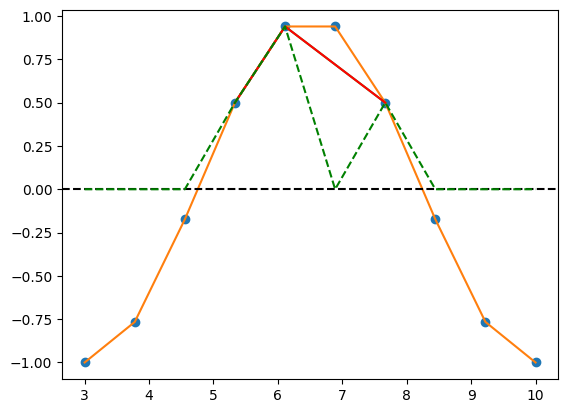

In [ ]:
for batch_idx in range(tensor.shape[0]):
    for time_idx in range(tensor.shape[1]):
        
        spectrum = tensor[batch_idx, time_idx, :]
        mask = spectrum >= 0
        idx_original = torch.where(mask)[0]
        print(idx_original)
        spectrum_positive = spectrum[mask]
        print(spectrum_positive)
        print(spectrum_positive.shape)
        sp_idx   = torch.linspace(0, len(idx_original)-1, steps=3).long()
        print(sp_idx)
        idx_wave = idx_original[sp_idx]
        
        wave_npoints     = wave[idx_wave]
        spectrum_npoints = spectrum_positive[sp_idx]
        
        print("Wave npoints:")
        print(wave_npoints)
        
        print(wave_npoints.shape)
        print(spectrum_npoints)
        print(spectrum_npoints.shape)
        coeffs = natural_cubic_spline_coeffs(wave_npoints, spectrum_npoints.unsqueeze(-1))
        spline = NaturalCubicSpline(coeffs)
        
        spline_values = spline.evaluate(wave_npoints)
        print(spline_values)
        spline_tensor = torch.zeros_like(tensor[batch_idx, time_idx, :])
        spline_tensor[idx_wave] = spline_values.squeeze(-1)
        print(spline_tensor)
        
        #plt.plot(wave, tensor[batch_idx, time_idx, :].cpu(), 'o', label='Original')
        #plt.plot(wave, spectrum)
        #plt.plot(wave_npoints, spectrum_npoints)
        #plt.axhline(0, color='k', ls='--')
        #plt.plot(wave_npoints, spline_values, color='red')
        #plt.plot(wave, spline_tensor, color='green', ls='--', label='Spline')
        #
        #plt.show()
        
        break
    break
        